# Implementação de rede neural convolucional

# Importações

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [20]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Carregando o dataset

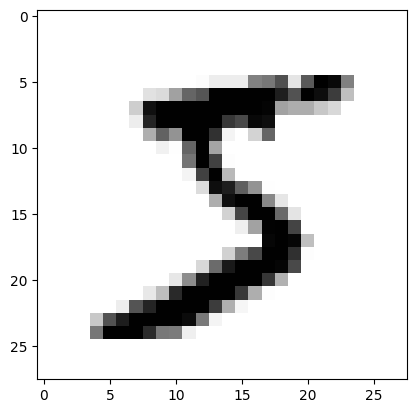

(28, 28)

In [21]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

# x_train[0]
x_train[0].shape

## Configurando a rede neural

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

## Treinando



In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2718 - accuracy: 0.9430
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0652 - accuracy: 0.9805
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0525 - accuracy: 0.9838


## Verificando o resultado

In [27]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
import numpy as np

In [45]:
print(np.argmax(predictions[3]))

0


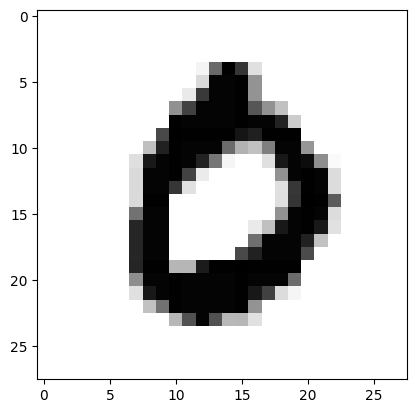

In [46]:
plt.imshow(x_test[3],cmap=plt.cm.binary)
plt.show()